In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# weights and biases

In [3]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02

In [4]:
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias


In [5]:
# splitting data to train and set
train_split=int(0.8*len(x))
x_train, y_train=x[:train_split], y[:train_split]
x_test, y_test=x[train_split:],y[train_split:]

In [6]:
x_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [19]:
def plot_data(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predic=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels,c="b",s=4,label="Training data")
    plt.scatter(test_data, test_labels,c="g",s=4,label="Testing data")
    if predic is not None:
        plt.scatter(test_data, predic, c="r", label="Preidictions")
    plt.legend(prop={"size":14})

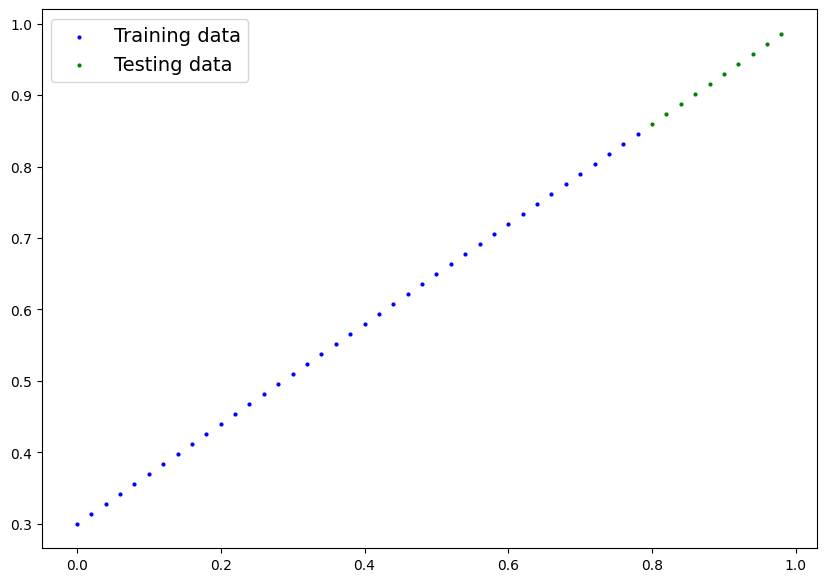

In [8]:
plot_data()

In [9]:
# Lets build model

# Requires_grad uses gradient descent to update weights and bias


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [10]:
torch.manual_seed(42)

model=LinearRegressionModel()

In [11]:
model.parameters()

<generator object Module.parameters at 0x00000212EC815D20>

In [12]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
with torch.inference_mode():
        y_preds=model(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

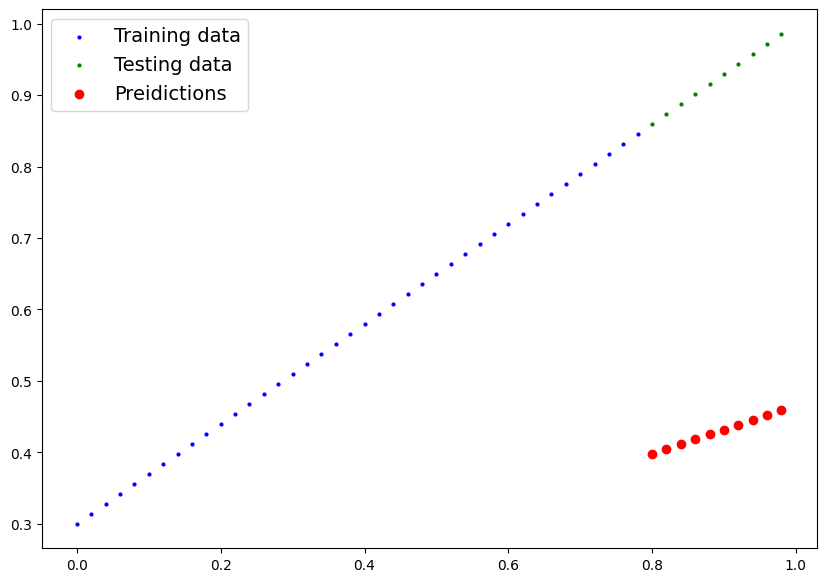

In [20]:
plot_data(predic=y_preds)

In [22]:
# training the model by computing loss and optimizing it

loss_fn=torch.nn.L1Loss()
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

In [36]:
epochs=100

for epoch in range(epochs):
    model.train()
    y_pred=model(x_train)
    loss=loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
print(f"Loss: {loss}")
print(model.state_dict())

Loss: 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])


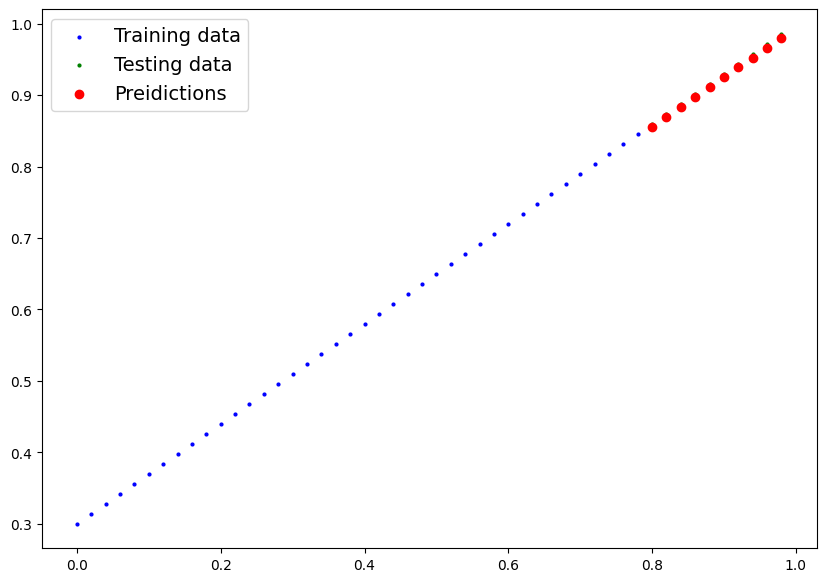

In [37]:
with torch.inference_mode():
    y_preds=model(x_test)

plot_data(predic=y_preds)

In [38]:
# Saving Model

from pathlib import Path

path=Path("model")
path.mkdir(parents=True, exist_ok=True)
savepath=path/"testing.pt"
print(savepath)

model\testing.pt


In [39]:
# could use safetensors for better compatibility
torch.save(obj=model.state_dict(), f=savepath)